# Praktikum : Classification - MNIST

**Docker im K019:**
- Laden Sie das Jupyter Notebook von Moodle in einen ML1-Praktikums-Ordner in Ihrem User-Ordner. 
- Geben Sie im Terminal ein: "docker_start_ml1_gpu". Dadurch wird ein Skript aufgerufen, das einen Docker-Container für Sie baut. Das Terminal bleibt offen, wechselt nun allerdings in einen Terminal des Docker-Containers.
- Öffnen Sie den angegebenen localhost:8888-Link mit Token im Browser. Ein Jupyter Notebook sollte sich öffnen. Unter dem Ordner "host" finden Sie Ihr Homedirectory und auch das Jupyter-Notebook für das Praktikum. 
- Zum Ende des Praktikums speichern Sie Ihre Fortschritte, und beenden dann den Docker Container mit der Eingabe von "exit" im Terminal. 

Wir arbeiten wieder mit dem MNIST Datensatz wie im 3. Praktikum. 
Der erste Teil ist 


#TODO
binäre Klassifikation: 
- Logistic Regression: Teilt den Raum durch eine lineare Hyperflächen in disjunkte Bereiche für die einzelnen Klassen mit dem Ziel, Cross-Entropy Loss zu minimieren. 
- SVM für binäre Klassifizierung: Hier wird der Raum ebenfalls durch Hyperflächen in disjunkte Bereiche geteilt, allerdings dieses mal mit dem geometrischen Ziel, mit der Hyperfläche den Margin zwischen den Klassen zu maximieren. 
- Classification Tree: Clustert die Instances mit einem binary tree, wobei bei jedem Split die impurity minimiert wird. Für jede Instance wird die häufigste Klasse im Leaf vorhergesagt
- Random Forest Classification: Ein Ensemble aus Classification Trees; vorhergesagt wird entweder die am häufigsten vorhergesagte Klasse oder der Wahrscheinlichkeitsvektor wobei die Wahrscheinlichkeit jeder Klasse die Häufigkeit der Vorhersage dieser Klasse unter allen Vorhersagen ist. 
- AdaBoost für binäre Klassifizierung: Ein additive boosting Model aus Classification Trees, das den exponentiellen Fehler minimiert. Jedes weitere Modell wird darauf trainiert, die Fehler der bisherigen Vorhersagen auszugleichen. 
- XGBoost: Ein Boosting Ensemble aus Bäumen mit zusätzlicher Regularisierung, welche die Größe der Bäume bestraft. 



Welche Modelle könnten Sie verwenden, um die Klassifikation von allen 10 Ziffern durchzuführen? 

#TODO
10-Klassen Klassifizierung.
- Softmax Regression
- Kombination von mehreren SVMs, e.g. 10 SVMs für die Klassifizierung aller Klassen. (one vs all) 
- Classification Tree
- Random Forest Classification
- SAMME
- XGBoost

Führen Sie den folgenden Code aus, um die Daten zu laden:


In [1]:
#Import der notwendigen Dependencies
import os
#zum Entpacken von Dateien:
import tarfile
#zum Herunterladen von Dateien:
import urllib.request
#zum Bearbeiten von "DataFrames"
import pandas as pd

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

MNIST_PATH = os.path.join("datasets", "MNIST")

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, data_home=MNIST_PATH)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original', data_home=MNIST_PATH)

X = mnist["data"]
y = mnist["target"]

Train-Test-Splitting:


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train ist ein numpy ndarray der shape (56000, 784). 

### 1. Trainieren von Binary Classifiers - Erweiterung von Praktikum 3

Wir starten wie in Praktikum 3 und trainieren auf MNIST zunächst binären Classifier - dieses Mal mehr als bisher. Wir machen wieder aus den alten Labels 0,1,2, ..., 9 neue Labels y_train_4 bzw. y_test_4, welche den Wert 1 haben für y=4 und 0 sonst.

In [ ]:
y_train_4 = (y_train == 4)*1
y_test_4 = (y_test == 4)*1

print(y_train[:5], y_train_4[:5])

Wie zuvor trainieren wir auf MNIST mit den neuen Labels ein Logistic Regression Modell log_reg:

In [ ]:
from sklearn.linear_model import LogisticRegression 
	
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, y_train_4)

Laden Sie den trainierten LinearSVC aus Praktikum 3 mit joblib.load. 

In [ ]:
import joblib

filename = os.path.join(MNIST_PATH , 'SVM_Classifier_MNIST.sav')
svm_clf = joblib.load(filename)

Hier machen wir nun weiter mit zusätzlichen Modellen:

Trainieren Sie einen Random Forest Classifier für den obigen ML task. Nennen Sie drei Baum-Spezifische Hyperparameter, die overfitting vermeiden. Beschreiben Sie diese in der nächsten Zelle.  Verwenden Sie Grid Search [GirdSearchCV](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html), um gute Hyperparameter für diesen Classifier zu finden. Benennen Sie den best_estimator_ mit forest_clf. 

#TODO:

Trainieren Sie nun ein entsprechendes [AdaBoost Modell]((https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)) basierend auf einem [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba) 

Achtung: Da Sie wieder mit einem DecisionTreeClassifier arbeiten, müssten Sie wieder die Hyperparameter für DecisionTrees beachten!

### 2. Bewerten der Modelle


**Fleißaufgabe, falls Sie Zeit haben, sonst springen Sie eins weiter:** 
Lassen Sie sich zunächst mittels .score() die mittlere accuracy = Genauigkeit der oben trainierten Modelle auf dem test set ausgeben und speichern Sie diese in einem Dictionary. 

**Hier auf jeden Fall weiter machen**:
Nun wollen wir mit etlichen statistischen Methoden die oben angelegten Modelle log_reg, svm_clf, forest_clf, ada_clf miteinander vergleichen. 
Um ums mit Schleifen etwas Zeit sparen zu können, legen wir zunächste in Dictionary dict_models an, in dem wir die Modelle speichern. 

Legen Sie dann ein Dictionary dict_test_predictions an, in dem Sie die .predict() Vorhersagen (also die Klassen, nicht die Wahrscheinlichkeiten) der vier Modelle auf den Testdaten abspeichern. 


In [ ]:
# Anlegen eines Dictionarys aus den Modellen
dict_models = 

# Anlegen eines Dictionarys aus Modellen und ihren Vorhersagen
dict_test_predictions = 


Legen Sie drei neue Dictionaries namens 
- dict_precisions
- dict_recalls
- dict_f1
an, in denen Sie die Precisions, Recalls bzw. F1-Scores der einzelnen Modelle abspeichern. 


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precisions:')
#TODO


print()

print('Recalls:')
#TODO


print()

print('F1-scores:')
#TODO



print()


1. Welches Modell würden Sie verwenden, wenn eine falsche Klassifizierung einer 5 oder 7 oder 1 als 4 Sie sehr viel Geld kosten würde?
2. Welches Modell würden Sie verwenden, wenn es schlimme Auswirkungen hätte, wenn eine 4 nicht erkannt wird?
3. Welches Modell würden Sie verwenden, wenn Sie ein ausgewogenes Modell haben wollen?

1. #TODO: 
2. #TODO: 
3. #TODO: 

##### Precision-Recall-Curve

Wir wollen nun die Precision_Recall-Curve für die Testdaten zeichnen. 

Erinnerung: Für ein Modell (mit fixem Threshold für die Wahrscheinlichkeit, zum Beispiel 50%, ab dem man eine Instance als positiv klassifiziert), gibt es einen Wert für Precision, und einen Wert für Recall. 

Lässt man allerdings den Threshold variieren (zum Beispiel weil man lieber auf Nummer sicher gehen will bei einer positiven Klassifizierung und erst ab 80% Wahrscheinlichkeit etwas als positiv klassifizieren lässt), so ändern sich entsprechend Recall und Precision Werte. Nun kann man den Threshold kontinuierlich von 0 bis 100% variieren - das ändert nicht die Wahrscheinlichkeitsvektoren, die das Modell prognostiziert, aber die Klassen, die auf Basis dieses Wahrscheinlichkeitsvektors für jede Instance festgelegt werden. 

Plottet man nun Recall und Precision für unterschiedliche Thresholds zwischen 0 und 100%, erhält man die Precision-Recall-Curve. 

Daher braucht precision_recall_curve als Input die vorhergesagten Wahrscheinlichkeiten des positiven Labels, nicht die vorhergesagten Klassen (die ändern sich ja, wenn man den Threshold variiert)! Also legen wir uns in der nächsten Zelle zunächst ein Dictionary dict_test_predictions_proba an, das für jedes Modell die vorhergesagten Wahrscheinlichkeitsvektoren (mit .predict_proba()) für das Test Set abspeichert.


In [14]:
#Berechnen der (2-dimensionalen) Wahrscheinlichkeitsvektoren (für negative und positive Klasse)
dict_test_predictions_proba = dict()

for model in dict_models: 
    dict_test_predictions_proba[model] = dict_models[model].predict_proba(X_test)


Nun berechnen Sie für jedes Modell aus den oben ausgerechneten Wahrscheinlichkeiten die Precision-Recall-Curve, indem Sie y_test_4 vergleichen mit den Wahrscheinlichkeiten der positiven Klasse, die Sie oben berechnet haben (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html). Hinweis: die Wahrscheinlichkeit der positiven Klasse (1) ist der zweite Eintrag in den Wahrscheinlichkeitsvektoren (der erste ist die Wahrscheinlichkeit der negativen Klasse 0). 

Erinnerung: precision_recall_curve gibt ein Tupel zurück, das aus einer Liste der precision-Werte, einer Liste der recall-Werte, und einer LIste der zugehörigen threshold-werte ausgibt. Mit diesen Werten kann man plotten.

Legen Sie sich zum Speichern der zu plottenden Daten für die vier Modelle ein Dictionary namens dict_precisions_recalls an, in dem Sie für jedes Modell precision, recall und threshold in einer Liste abspeichern. 

In [15]:
#Berechnen der precision_recall_curve
from sklearn.metrics import precision_recall_curve

dict_precisions_recalls = dict()

for model in dict_test_predictions_proba: 
    #TODO

Plotten Sie nun die Precision-Recall Curves für alle Modelle in einem Plot.

In [ ]:
#Zeichnen der Precision-Recall Curve mit plt


Welches der Modelle ist hier das Beste? 

#TODO: 

##### ROC curves

So ähnlich wie man die Precision Recall Curve erhält, erhält man auch die ROC Curve: hier berechnet man True Positive Rate und False Positive Rate für verschiedene Thresholds zwischen 0 und 100% und plottet die sich ergebende Kurve für die Modelle. 

Zur Erinnerung:
 
True positive rate = Instances, die als positiv eingestuft werden und tatsächlich positiv sind / (alle instances, die tatsächlich positiv sind) = instances mit prediction 1 und y_test_4=1 / instances mit y_test_4=1

False positive rate = Instances, die als positiv eingestuft werden und tatsächlich negativ sind / (alle instances, die tatsächlich negativ sind) = instances mit prediction 1 und y_test_4=0 / instances mit y_test_4=0

Zeichnen Sie die ROC Curve (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) für alle Modelle mit variierenden Thresholds und markieren den Punkt, den log_reg (mit dem fixen Threshold!) auf der ROC Curve für Logistic Regression einnimmt, indem Sie den oben berechneten Punkt einzeichnen. Hinweis: roc_curve nimmt als Vorhersage des Modells wiederum die Wahrscheinlichkeit der positiven Klasse, wie bei precision_recall_curve. 

Legen Sie sich hierzu zunächst wie zuvor ein Dictionary an, das für alle vier Modelle das Tupel (fpr, tpr, threshold) abspeichert, das sie als Ergebnis von roc_curve erhalten. 

Plotten Sie dann die ROC-Curves aus diesen Daten für alle Modelle, indem Sie fpr vs tpr plotten.

In [ ]:
from sklearn.metrics import roc_curve

dict_roc_values = dict()
for model in dict_models:
    #TODO

### Ausweiten von SVMs auf 10 Klassen

SVM ist klassischerweise ein binary classifier. Kann man diesen in einen multiclass classifier umwandeln? Antwort: ja! 

1. Möglichkeit: Trainiere für jeweils zwei der Klassen (also 0 und 1, 0 und 2, 0 und 3, ... , 1 und 2, 1 und 3, etc) einen SVM Classifier, der für jedes Bild ausgibt, in welcher der zwei Klassen es wahrscheinlicher liegt. Kombiniere die Classifiers (das sind sehr viele, genauer gesagt 2 aus 10!), indem man jedes Bild x der Klasse zuordnet, in die es die meisten SVM Classifier gesteckt hätten. Solch einen Classifier nennt man **OneVsOne-Classifier**; in Scikit-Learn: 
```python
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVM())
```
Nachteil: Die Trainingszeit multipliziert sich um ein vielfaches!
2. Möglichkeit: 
Trainiere für jede der Klassen 0,1,..., 9 einen eigenen SVM-Classifier wie oben, der nur aussagt, ob ein Bild in diese Klasse gehört oder nicht. Wenn mehrere Classifier das Bild ihrer Klasse zuordnen würden (z.B. 8 und 9), dann gewinnt der SVM Classifier, der sich bei seiner Entscheidung sicherer ist, d.h. bei dem das Bild weiter weg ist von der Decision Boundary.Solch einen Classifier nennt man **OneVsAll-Classifier**, oder **OneVsRest-Classifier**. in Scikit-Learn:
```python
from sklearn.multiclass import OneVsRestClassifier
ovo_clf = OneVsRestClassifier(SVM())
```
In den oben genannten OneVsXXXClassifiers kann man anstelle von SVM auch andere binary classifiers verwenden. 

Nachteil: hier ist die Trainingsdauer immer sehr viel länger als wenn man einfach ein Modell benutzt, das multiclass classification natürlicherweise kann, wie z.B. Logistic Regression, oder Random Forests. 

Für diese beiden Modelle könnte man die obigen classifications ganz leicht auch für alle Zahlen 0 bis 9 durchführen, was wir hier aus Zeitgründen aber nicht mehr durchführen.


### Beispiel für multiclass classification: KNN Classification

KNN, oder "K nearest neighbor classification", merkt sich alle Trainingsdaten, und vergleicht eine neue instance mit den K im feature space nächstgelegenen Trainingsdaten, sieht sich an, welche Klasse die meisten dieser K nearest neighbors haben, und prognostiziert diese Klasse für die neue instance. 

Trainieren Sie einen KNN Classifier für die vollen MNIST Daten und berechnen Sie die Accuracy des Modells auf den Test-Daten. 

 Würden Sie KNN Classification für ein Trainingsset von 1 Mio. Trainingsdaten verwenden? Warum bzw. warum nicht?

#TODO: 

Aufgabe: 

Betrachten Sie die folgenden Daten: Was ist die Accuracy auf den Trainigsdaten mit 3NN-Classification und mit 1NN-Classification, wenn für die Prognose eines jeden Trainigspunkts auch dieser selbst noch im gemerkten Trainingsdatenset ist?

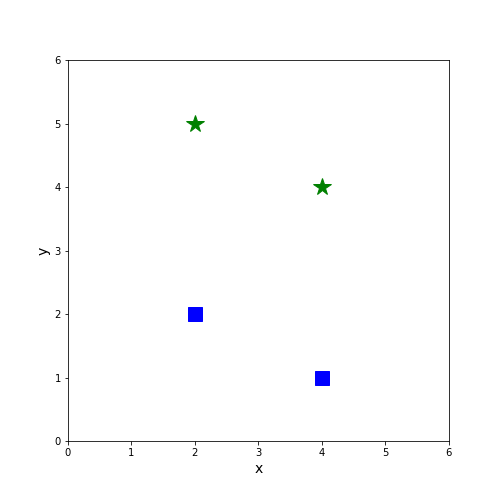



#TODO: 
- 3NN: 
- 1NN: 

### 3. Feature Importance des Random Forest Classifier

Der Random Forest Classifier hat nicht nur den Vorteil, dass er schnell und gut und für multiclass classification geeignet ist, sondern auch den Vorteil, dass man sich die Wichtigkeit der einzelnen Input-Features ausgeben lassen kann. Dies bentut man in der Realität oft, um erst mal die Features, die man hat, besser zu verstehen, und evtl etwas auszudünnen, um nur mit den wirklich relevanten Features ein anderes ML Modell zu trainieren. 

Lassen Sie sich für den oben trainierten Random Forest Classifier, der eine 4 erkennt, die feature importance ausgeben!

In [ ]:
feature_imp = #TODO

print(feature_imp)

Wir plotten nun die Feature Importance als 28x28-Bild mit .imshow(). 

In [ ]:
importance_image = feature_imp.reshape(28,28)
plt.imshow(importance_image, cmap=mpl.cm.hot)
plt.axis("off")

## Dimensionality Reduction und Clustering



Die MNIST Bilder haben 28x28 pixel, entsprechen also 784-dimensionalen Vektoren. Verwenden Sie PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), um die MNIST Bilder von 784 Dimensionen auf weniger zu komprimieren. Dabei wollen wir 95% der Varianz in den Daten erhalten. Finden Sie heraus, auf wie viele Dimensionen in diesem Fall projiziert wird. Nennen Sie die komprimierten Daten X_reduced.

Berechnen Sie die "decompressed" Version der komprimierten Daten X_reduced und nennen Sie diese Daten X_recovered.

Wählen Sie eine beliebige Instance von X_recovered, reshapen Sie diese als 28x28 Bild, und lassen Sie es sich anzeigen.

### Unsupervised Method: Clustering

Nun verwenden wir Clustering, um die MNIST Bilder in 10 verschiedene Cluster zu unterteilen. Vorteil: Diese Methode kann man auch zum klassifizieren von ungelabelten Daten verwenden! Da clustering keine Labels verwendet (unsupervised), und wir nicht mit "wirklichen" Ergebnissen Vergleichen können, brauchen wir hier auch nicht in train und test set zu unterteilen. 


Verwenden Sie zuerst das K-Means Modell kmeans10 für K=10 (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), und verwenden Sie alle MNIST daten X, nicht nur die Trainings-Daten. Lassen Sie sich die Cluster Centers mit cluster_centers_ ausgeben, und berechnen Sie die Silhouette Score. Ist dieser Wert gut? #TODO

freiwillige Zusatz-"Herumspiel"-Aufgabe: Vergleichen Sie die Ground Truth Labels mit den jeder Instance zugeorndeten Cluster-Nummer, und geben Sie die Matrix aus (z.B. als DataFrame), die angibt, wie viele true label j instances einem cluster i zugeordnet werden. Würden Sie bei diesem Ergebnis Clustering verwenden, um eine Klassifizierung durchzuführen, wenn Sie auch Labels haben? 

#TODO: 

Anscheinend klappt das Clustering bei den Bilddaten sehr schlecht! Dies kann man folgendermaßen erklären: Betrachten Sie zwei Bilder der gleichen handgeschriebenen Zahl 8, wobei aber die Ziffer im einen Fall rechtsbündig, im anderen Fall linksbündig im Bild liegt. Die Vorhersage sollte dieselbe sein, doch in beiden Bildern sind ganz andere Pixel hell, das heißt die Werte der einzelnen Features ganz unterschiedlich! Im Feature Space wären diese beiden Bilder derselben Zahl also sehr weit auseinander - eventuell weiter auseinander als eine 8 und eine 4, die zufällig den selben Bildausschnitt einnehmen! Das ist der Grund, weshalb ein einzelnes Feature bei den MNIST Bildern wenig Aussagekraft hat, und die Cluster im Feature Space auch nicht unbedingt viel damit zu tun haben, welche Ziffern abgebildet sind. 

Wir merken also: die Methoden, die wir kennen gelernt haben, funktionieren manchmal, aber nicht immer! Es hängt alles von den Daten und ihrer Beschaffenheit ab, was funktioniert, und was nicht, und manchmal sind Methoden für gewissen Daten einfach schlecht geeignet, wie hier Clustering für die Klassifizierung von handgeschriebenen Ziffern. Manche Sachen kann mich sich durch "gesunden Menschenverstand" und Kenntnis der Theorie nicht nur erklären, sondern vorab herleiten, und sich damit viel Zeit sparen. Es bringt also durchaus viel für die praktische Anwendung, die Wirkungsweise von Modellen wirklich durchdrungen zu haben! 

Nachdem wir uns nun Gedanken gemacht haben, warum einzelne Features und Abstände im Feature Space bei Bildern nicht unbedingt so aussagekräftig sind wie es ein einzelnes Feature beim Housing-Dataset war (z.B. median income), können wir uns die Frage stellen, ob die obigen Methoden überhaupt geeignet sind für die Auswertung von Bilddaten... 

Z.B.: Wollen wir Bilder von Katzen und Hunden klassifizieren, kann es sein, dass die Tiere nicht immer zentral und in der gleichen Größe abgebildet sind wie hier bei den MNIST Bildern. Ein Kätzchen im rechten oberen Eck und eine Katze links unten würden von einem der obigen Algorithmen wohl unterschiedlicher eingeschätzt werden als eine Katze und ein Hund am gleichen Ort und in der gleichen Größe... Wie können wir einer künstlichen Intelligenz beibringen, Verschiebungen im Bild nicht zu beachten, wenn dies jedoch bedeutet, dass ganz andere Features/Dimensionen die einander entsprechenden Werte haben?

Dazu gibt es eine spezielle Klasse von neuronalen Netzen, die genau diese "Translationsinvarianz" von Bildern berücksichtigt. Convolution Neural Networks oder Transformer (btw: Transformer sind die Technologie hinter ChatGPT...)... mit diesen hätten wir auch die MNIST Bilder noch besser klassifizieren können als mit den obigen Methoden! Diese lernen wir im nächsten Semester...

